In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:

data['new']=2020
data['life']=data['new']-data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,new,life
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [5]:
data.drop(['Year','new'],axis=1,inplace=True)

In [6]:
data.isnull().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
life             0
dtype: int64

In [7]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
cat_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [8]:
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
num_features

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'life']

In [9]:
discrete_features=[feature for feature in num_features if len(data[feature].unique())<10]
discrete_features

['Owner']

In [10]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,life
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [11]:
continuous_features=[feature for feature in num_features if len(data[feature].unique())>10]
continuous_features

['Selling_Price', 'Present_Price', 'Kms_Driven', 'life']

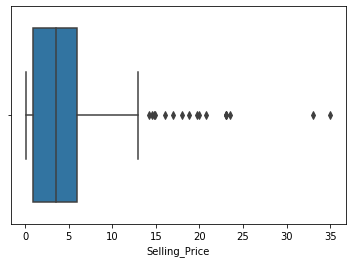

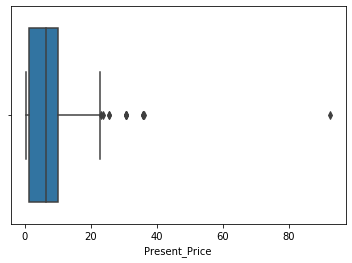

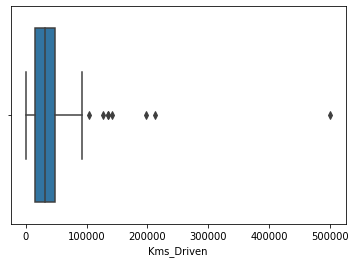

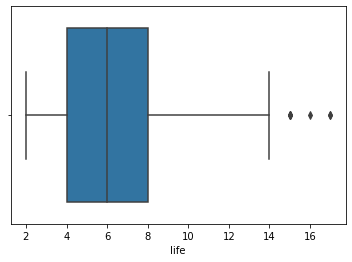

In [12]:
for feature in continuous_features:
    sns.boxplot(x=data[feature])
    plt.show()
    

In [13]:
from scipy import stats
z=np.abs(stats.zscore(data[continuous_features]))
z

array([[0.25841591, 0.23621461, 0.25622446, 0.128897  ],
       [0.01748088, 0.22150462, 0.1559105 , 0.21751369],
       [0.51015372, 0.25742689, 0.77396901, 1.16812909],
       ...,
       [0.25841591, 0.39068691, 1.31334003, 1.60315648],
       [1.34769755, 0.56450434, 0.7198763 , 1.16812909],
       [0.12586891, 0.20029235, 0.81095812, 0.8217184 ]])

In [14]:
outliers=np.where((z>3))

In [15]:
outliers=list(outliers[0])

In [16]:
data.drop(outliers,inplace=True)

In [17]:
data.shape

(286, 9)

In [18]:
 data[continuous_features].shape

(286, 4)

Trying to remove outliers by IQR

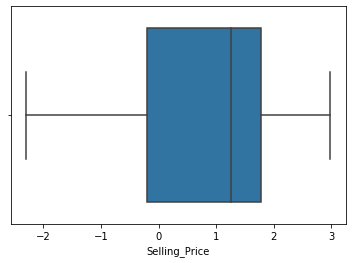

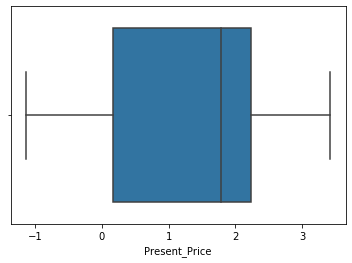

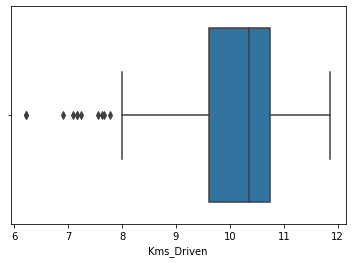

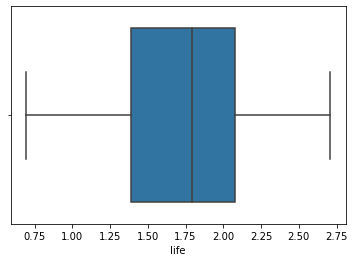

In [75]:
for feature in continuous_features:
    sns.boxplot(data[feature])
    plt.show()

In [76]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,life,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.208960,1.720979,10.203592,0,1.791759,0,1,0,1
1,1.558145,2.255493,10.668955,0,1.945910,1,0,0,1
2,1.981001,2.287471,8.839277,0,1.098612,0,1,0,1
3,1.047319,1.423108,8.556414,0,2.197225,0,1,0,1
4,1.526056,1.927164,10.656082,0,1.791759,1,0,0,1


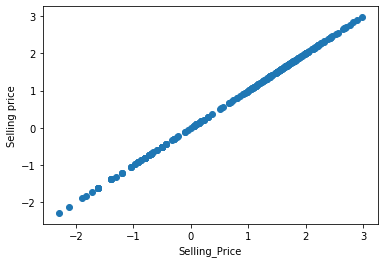

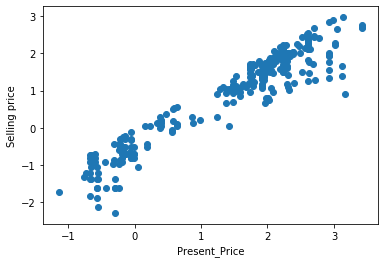

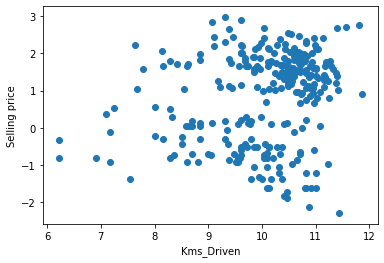

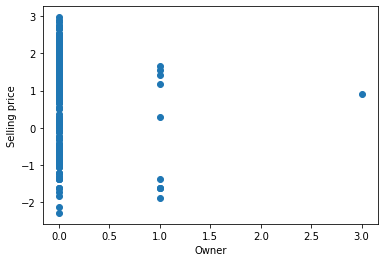

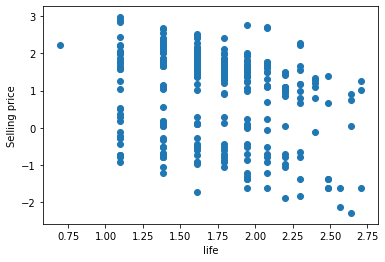

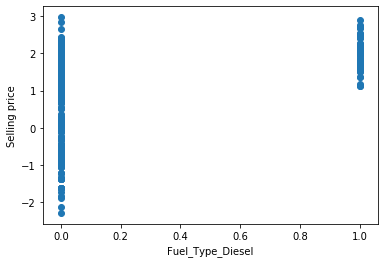

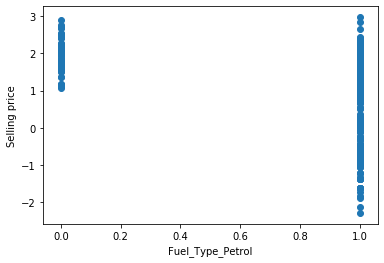

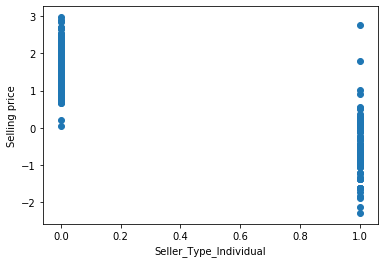

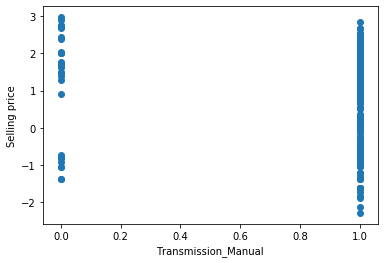

In [77]:
 for feature in data.columns:
        plt.scatter(x=data[feature],y=data['Selling_Price'])
        plt.xlabel(feature)
        plt.ylabel('Selling price')
        plt.show()

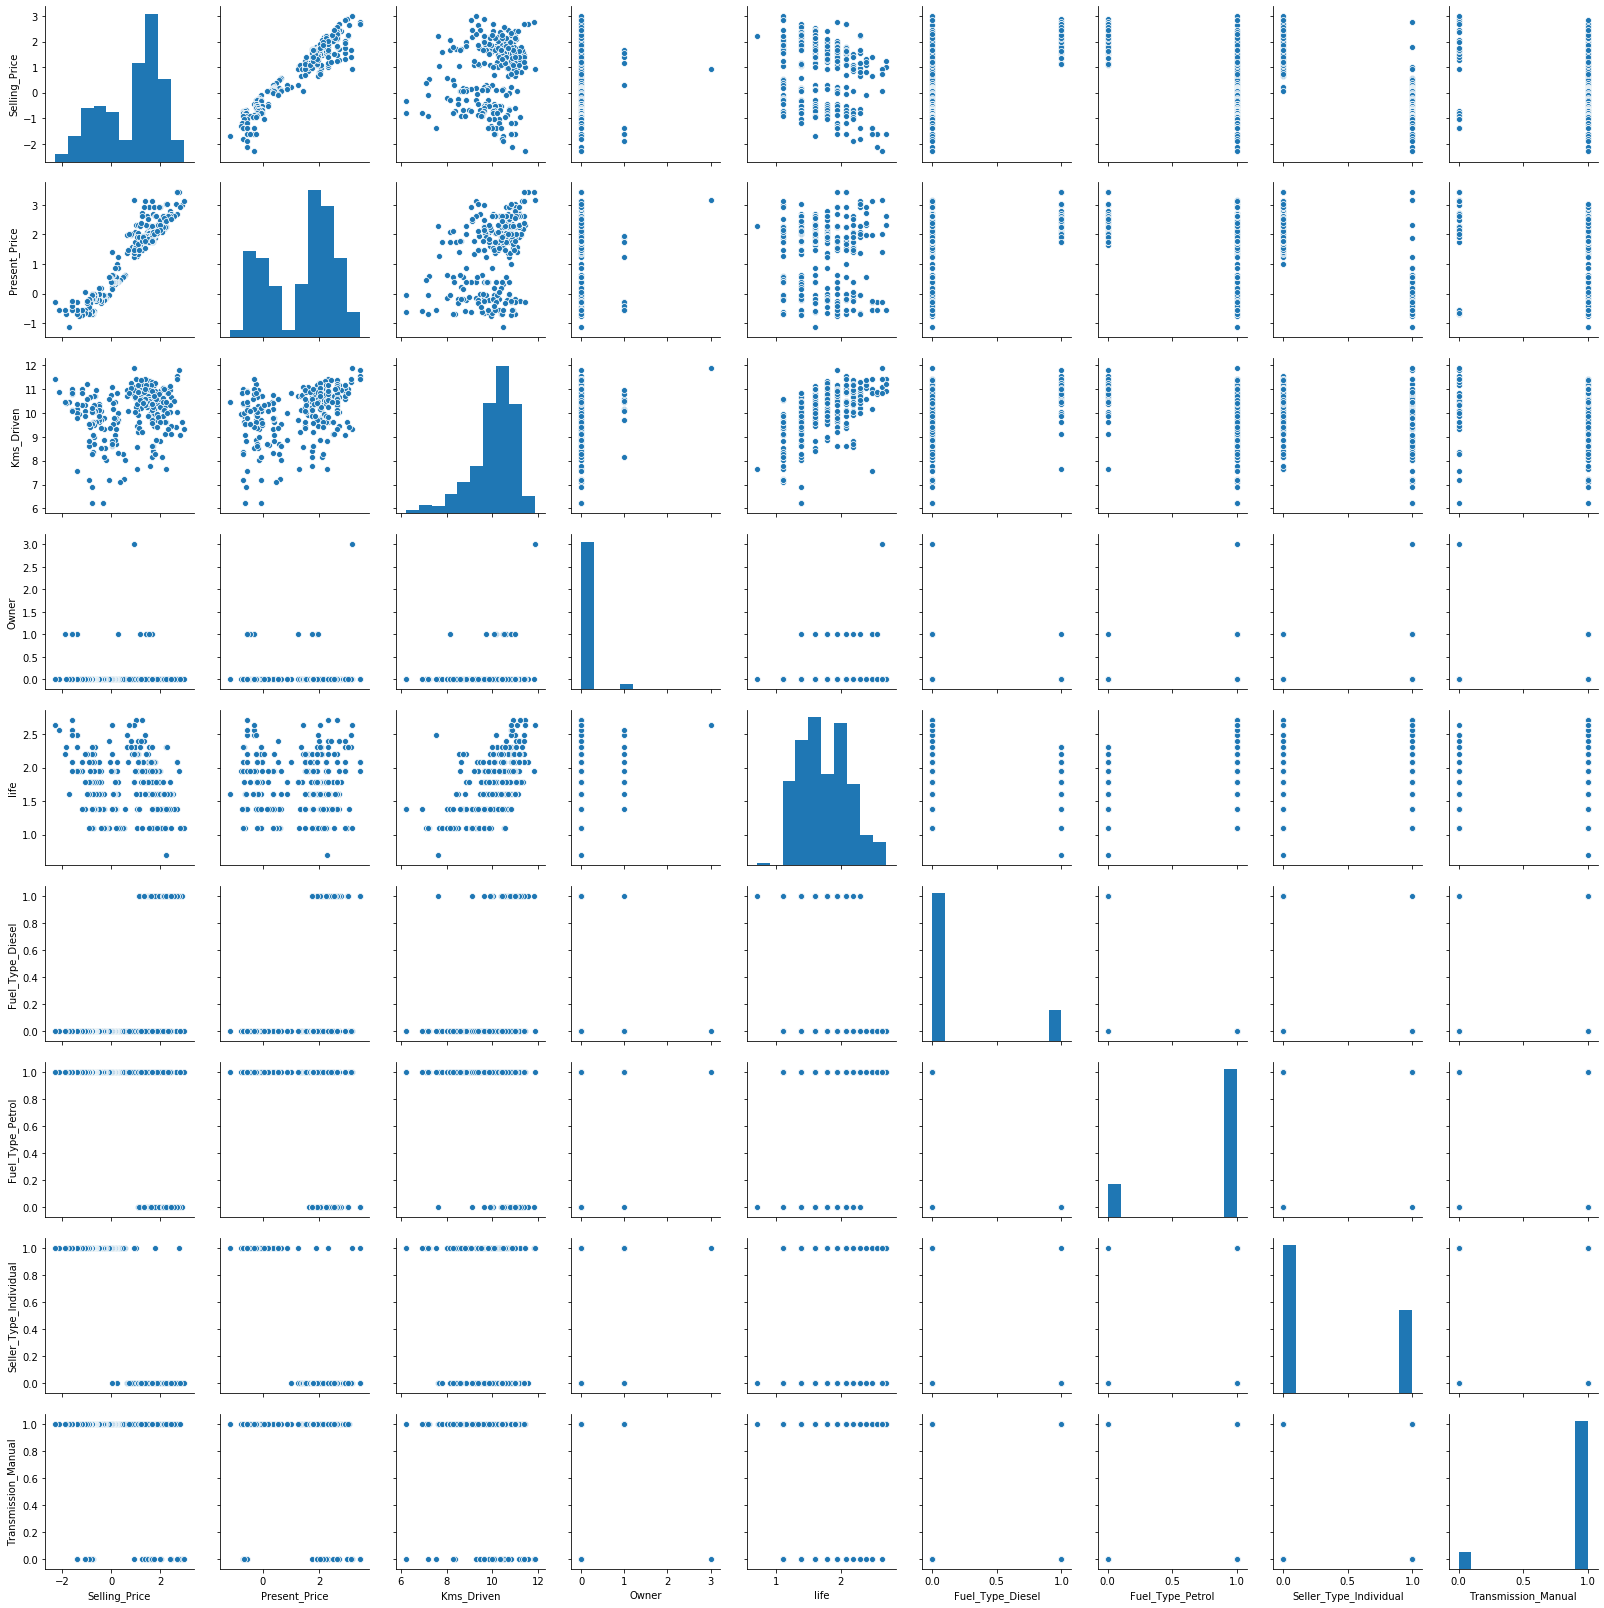

In [78]:
sns.pairplot(data)

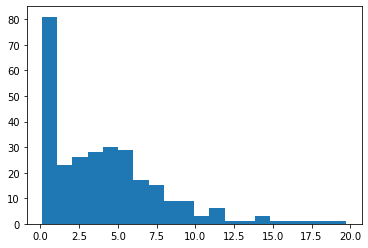

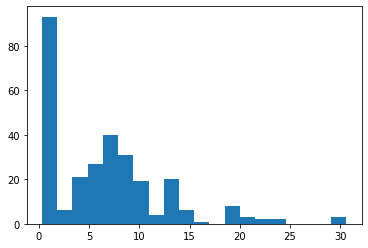

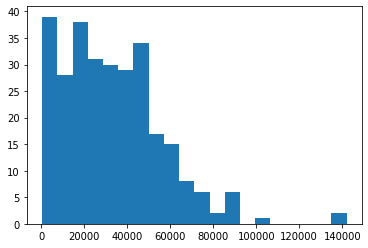

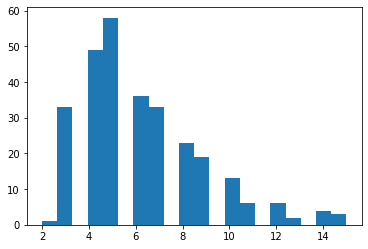

In [23]:
for feature in continuous_features:
    plt.hist(x=data[feature],bins=20)
    plt.show()

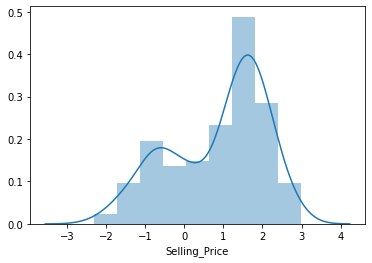

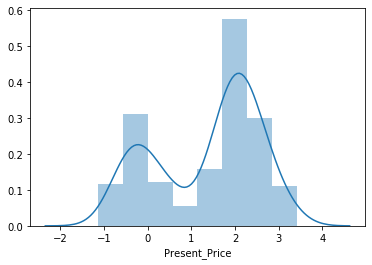

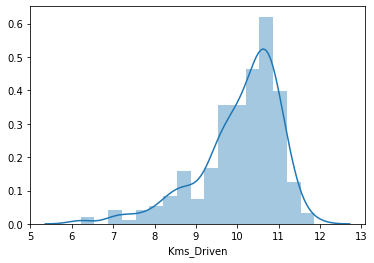

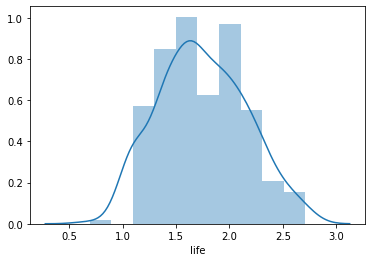

In [79]:
for feature in continuous_features:
    sns.distplot(data[feature],kde=True)
    plt.show()

# graph is skewed so log transformation

In [25]:
for feature in continuous_features:
        data[feature]=np.log(data[feature])

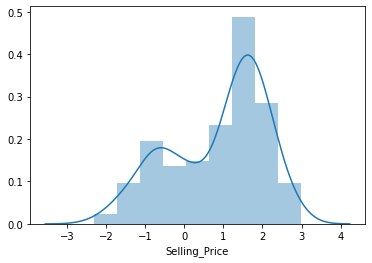

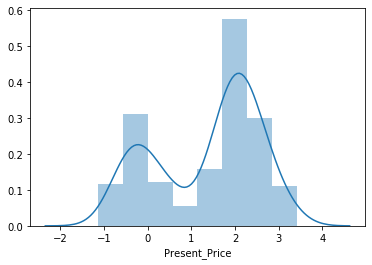

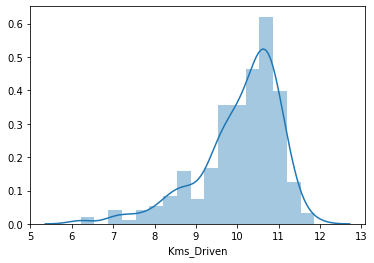

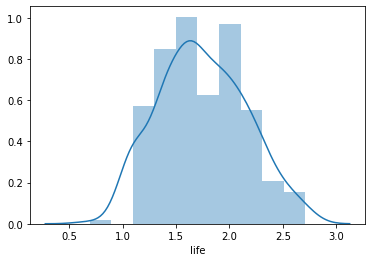

In [26]:
for feature in continuous_features:
    sns.distplot(data[feature],kde=True)
    plt.show()

In [27]:
data[cat_features].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [28]:
for feature in cat_features:
    print(feature,'unique values{}'.format(len(data[feature].unique())))

Car_Name unique values95
Fuel_Type unique values3
Seller_Type unique values2
Transmission unique values2


In [29]:
data.drop('Car_Name',axis=1,inplace=True)

In [30]:
data=pd.get_dummies(data,drop_first=True)

In [31]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,life,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.208960,1.720979,10.203592,0,1.791759,0,1,0,1
1,1.558145,2.255493,10.668955,0,1.945910,1,0,0,1
2,1.981001,2.287471,8.839277,0,1.098612,0,1,0,1
3,1.047319,1.423108,8.556414,0,2.197225,0,1,0,1
4,1.526056,1.927164,10.656082,0,1.791759,1,0,0,1


In [32]:
columns=data.iloc[:,1:].columns

In [33]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
fit=mn.fit(data.iloc[:,1:])
scaled_data=fit.transform(data.iloc[:,1:])
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns=columns
scaled_data.head()

,Present_Price,Kms_Driven,Owner,life,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.627179,0.706143,0.0,0.545243,0.0,1.0,0.0,1.0
1,0.744377,0.788523,0.0,0.621749,1.0,0.0,0.0,1.0
2,0.751389,0.464627,0.0,0.201233,0.0,1.0,0.0,1.0
3,0.561867,0.414554,0.0,0.746476,0.0,1.0,0.0,1.0
4,0.672387,0.786244,0.0,0.545243,1.0,0.0,0.0,1.0


In [34]:
x=scaled_data.iloc[:,:]
y=data['Selling_Price']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.head()

,Present_Price,Kms_Driven,Owner,life,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
46,0.697680,0.698575,0.0,0.454757,0.0,1.0,0.0,1.0
257,0.754703,0.710034,0.0,0.454757,0.0,1.0,0.0,1.0
214,0.669819,0.822614,0.0,0.688020,1.0,0.0,0.0,1.0
167,0.088903,0.815222,0.0,0.344010,0.0,1.0,1.0,1.0
223,0.741136,0.848207,0.0,0.621749,0.0,1.0,0.0,1.0


In [37]:
y_train.head()

48     1.757858
272    2.014903
229    1.131402
181   -1.203973
238    1.568616
Name: Selling_Price, dtype: float64

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Model selection

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

linear Regression

In [40]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred=lr.predict(x_test)

In [42]:
mse=print(np.mean((y_test-y_pred)**2))

0.03881840279304382


In [43]:
rscore=lr.score(x_test,y_test)
rscore

0.9711762257404531

In [44]:
rscore=lr.score(x_train,y_train)
rscore

0.9761362394732854

In [45]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.15039135728076342
MSE: 0.03881840279304382
RMSE: 0.19702386351161583


Ridge Regression

In [46]:
ridge=Ridge(alpha=0.005,normalize=True)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)


In [47]:
rscore=ridge.score(x_test,y_test)
rscore

0.9708081663790152

In [48]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.1508325506379854
MSE: 0.03931408654408199
RMSE: 0.1982778014405092


lasso

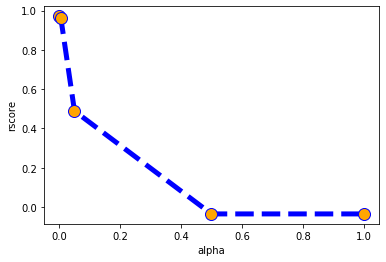

In [49]:
alpha=[0.00005,0.005,0.05,0.5,1]
rscore=[]
for i in alpha:
    lasso=Lasso(alpha=i,normalize=True)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    rscore.append(lasso.score(x_test,y_test))
plt.plot(alpha,rscore,linestyle='dashed',color='blue',linewidth=5,marker='o',markersize='12',markerfacecolor='orange')
plt.xlabel('alpha')
plt.ylabel('rscore')
plt.show()

    

    

In [50]:
lasso=Lasso(alpha=0.0005,normalize=True)
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)

In [51]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.1475964988227197
MSE: 0.03713978598872867
RMSE: 0.19271685444903014


In [52]:
rscore=lasso.score(x_test,y_test)
rscore

0.9724226467252067

Random forest Regressor

hyperparameter tuning

In [53]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

In [54]:
model=ExtraTreesRegressor()
model.fit(x_train,y_train)

C:\Users\aman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [55]:
array=model.feature_importances_

In [56]:
ser=pd.Series(array,index=x_train.columns).sort_values(ascending=True)
ser.head()

Owner                  0.001680
Transmission_Manual    0.002577
Fuel_Type_Petrol       0.003458
Fuel_Type_Diesel       0.014610
Kms_Driven             0.018678
dtype: float64

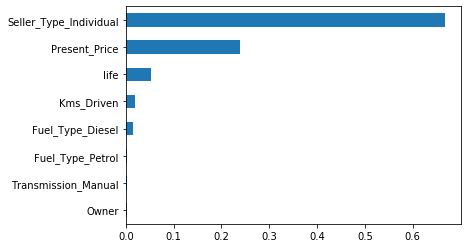

In [57]:
ser.plot(kind='barh')

In [58]:
n_estimators=[x for x in range(10,100,10)]
max_features=['auto','sqrt','log2']
max_depth=[x for x in range(5,30,5)]
min_sample_leaf=[2,4,6,8,10]
min_sample_split=[2,3,4,5]
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf':min_sample_leaf,
    'min_samples_split':min_sample_split
}

In [59]:
model=RandomForestRegressor()

In [60]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>

In [61]:
rd=RandomizedSearchCV(estimator=model,param_distributions=random_grid,cv=5,n_iter=10,verbose=2,random_state=0,scoring='neg_mean_squared_error')

In [62]:
rd.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.0s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.0s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.0s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 
[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.0s
[CV] n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=3, min_samples_leaf=6, max_features=log2, max_depth=25, total=   0.0s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=2

[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=8, max_features=log2, max_depth=25, total=   0.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
C:\Users\aman\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [63]:
rd.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [64]:
model=RandomForestRegressor(n_estimators=70,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=20)

In [65]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
y_pred=model.predict(x_test)

In [67]:
model.score(x_test,y_test)

0.9713777745480464

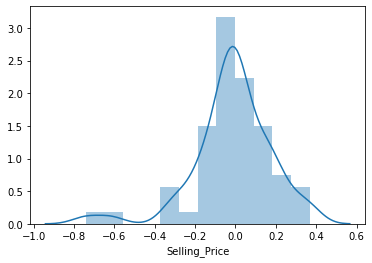

In [68]:
sns.distplot(y_test-y_pred)

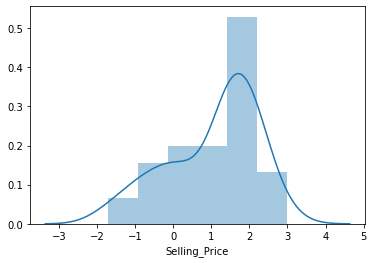

In [69]:
sns.distplot(y_test)

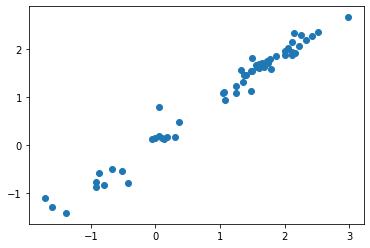

In [70]:
plt.scatter(y_test,y_pred)

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [72]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.135471320688036
MSE: 0.03854696704264003
RMSE: 0.19633381533154198


In [73]:
import pickle

In [74]:
file=open('random_forest_regression1_model.pkl','wb')
pickle.dump(model,file)